Dataset: United States Chronic Disease Indicators

Last Updated: March 9, 2024

Source: CDC Chronic Disease Indicators

Description: This dataset provides a cross-cutting set of 115 indicators developed to monitor chronic diseases, with data collected by the CDC's Division of Population Health. It includes state-specific data useful for public health practice.

In [1]:
pip install ipython-sql

Note: you may need to restart the kernel to use updated packages.


In [3]:
# Load the SQL extension
%load_ext sql

# Connect to an SQLite database
%sql sqlite:///health_data.db

# Now you can run SQL queries directly in your notebook
%sql CREATE TABLE States (state_id INTEGER PRIMARY KEY, state_name TEXT, population INTEGER);

 * sqlite:///health_data.db
Done.


[]

In [19]:
import sqlite3

# Connect to the SQLite database (this will create the database if it doesn't exist)
conn = sqlite3.connect('health_data.db')
cursor = conn.cursor()

In [31]:
# SQL to create the "States" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS States (
    state_id INTEGER PRIMARY KEY,
    state_name TEXT,
    population INTEGER
)
''')

In [23]:
# SQL to create the "ChronicDiseases" table
cursor.execute('''
CREATE TABLE IF NOT EXISTS ChronicDiseases (
    disease_id INTEGER PRIMARY KEY,
    state_id INTEGER,
    disease_name TEXT,
    disease_prevalence_rate FLOAT,
    FOREIGN KEY (state_id) REFERENCES States(state_id)
)
''')

In [43]:
import sqlite3

# Connect to the SQLite database
conn = sqlite3.connect('health_data.db')
cursor = conn.cursor()

# Execute the SQL query
cursor.execute('''
SELECT States.state_name, ChronicDiseases.disease_name, ChronicDiseases.disease_prevalence_rate
FROM States
JOIN ChronicDiseases ON States.state_id = ChronicDiseases.state_id;
''')

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

('California', 'Hypertension', 29.5)
('Texas', 'Diabetes', 12.0)
('Florida', 'Cancer', 4.3)
('California', 'Hypertension', 29.5)
('Texas', 'Diabetes', 12.0)
('Florida', 'Cancer', 4.3)


In [47]:
conn = sqlite3.connect('health_data.db')
cursor = conn.cursor()

# SQL query to calculate the average disease prevalence rate by state
cursor.execute('''
SELECT state_name, AVG(disease_prevalence_rate) AS avg_prevalence
FROM States
JOIN ChronicDiseases ON States.state_id = ChronicDiseases.state_id
GROUP BY state_name;
''')

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

('California', 29.5)
('Florida', 4.3)
('Texas', 12.0)


Query 1: Calculate the average disease prevalence rate by state.

In [47]:
conn = sqlite3.connect('health_data.db')
cursor = conn.cursor()

# SQL query to calculate the average disease prevalence rate by state
cursor.execute('''
SELECT state_name, AVG(disease_prevalence_rate) AS avg_prevalence
FROM States
JOIN ChronicDiseases ON States.state_id = ChronicDiseases.state_id
GROUP BY state_name;
''')

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

('California', 29.5)
('Florida', 4.3)
('Texas', 12.0)


Query 2: Retrieve the states where the disease prevalence rate is above 10%.

In [51]:
# SQL query to select states and diseases with a prevalence rate greater than 10
cursor.execute('''
SELECT state_name, disease_name, disease_prevalence_rate
FROM States
JOIN ChronicDiseases ON States.state_id = ChronicDiseases.state_id
WHERE disease_prevalence_rate > 10;
''')

# Fetch all the results
results = cursor.fetchall()

# Print the results
for row in results:
    print(row)

('California', 'Hypertension', 29.5)
('Texas', 'Diabetes', 12.0)
('California', 'Hypertension', 29.5)
('Texas', 'Diabetes', 12.0)


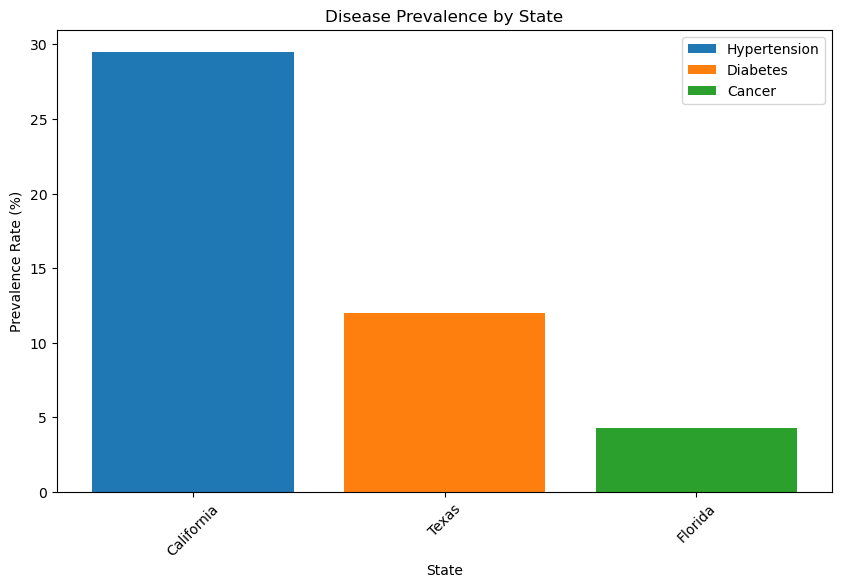

In [69]:
import sqlite3
import matplotlib.pyplot as plt
import pandas as pd

# Connect to the database
conn = sqlite3.connect('health_data.db')
cursor = conn.cursor()

# Execute a query to get disease prevalence rates
query = '''
SELECT States.state_name, ChronicDiseases.disease_name, ChronicDiseases.disease_prevalence_rate
FROM States
JOIN ChronicDiseases ON States.state_id = ChronicDiseases.state_id;
'''
df = pd.read_sql(query, conn)

# Create a bar chart
plt.figure(figsize=(10, 6))
for disease in df['disease_name'].unique():
    disease_data = df[df['disease_name'] == disease]
    plt.bar(disease_data['state_name'], disease_data['disease_prevalence_rate'], label=disease)

plt.xlabel('State')
plt.ylabel('Prevalence Rate (%)')
plt.title('Disease Prevalence by State')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Close the connection
conn.close()
